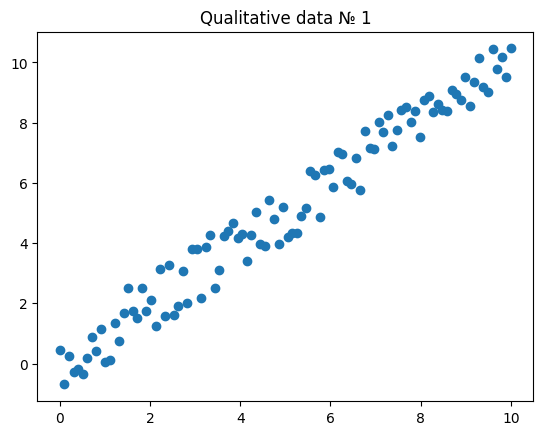

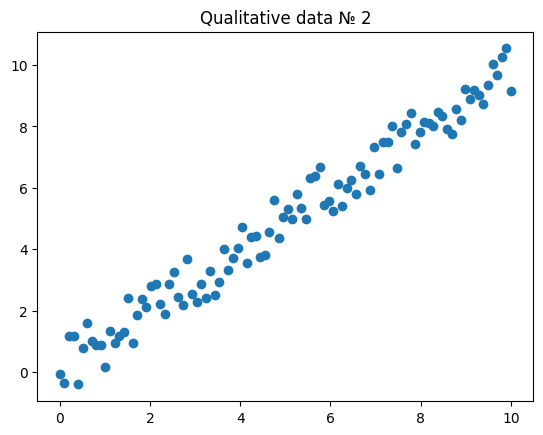

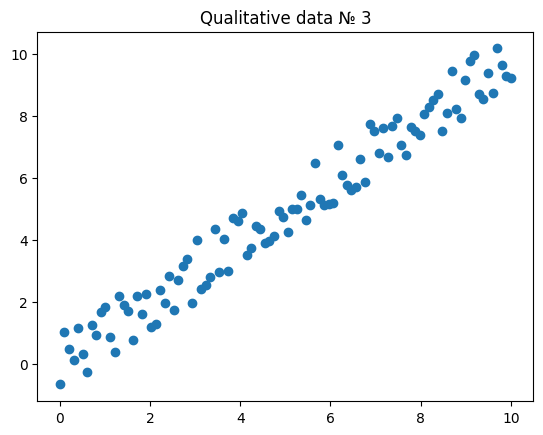

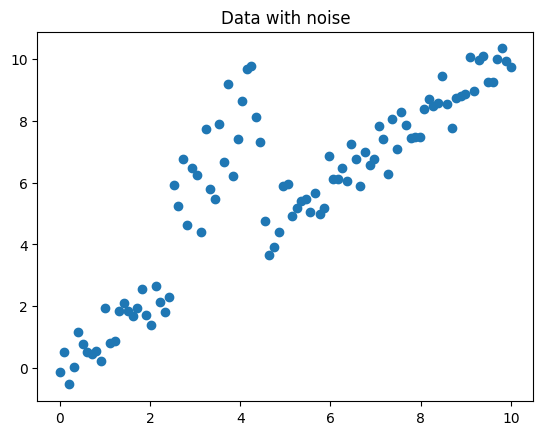

Датасет 1. MSE: 0.41454674683831433
Датасет 2. MSE: 0.2696326333989542
Датасет 3. MSE: 0.35663545923869194
Датасет 4. MSE: 2.9826756759933897
Внимание!!! В датасете 4 присутствует шум. MSE: 2.9826756759933897


In [ ]:
# этот вариант ноутбука для запуска через финкции - как есть

# импорт библиотек

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# функция генерации данных
def generate_data(start, stop, num=100, noise=None):
    x = np.linspace(start, stop, num)
    y  = x + np.random.random(num) * 2 - 1
    x = pd.DataFrame(x, columns=['feature'])

    if noise is not None:
        y[int(num * 0.25):int(num * 0.45)] *= noise

    return x, y

# генерация данных с качественными данными
x_1, y_1 = generate_data(0, 10)
x_2, y_2 = generate_data(0, 10)
x_3, y_3 = generate_data(0, 10)

q_data = ((x_1, y_1, ), (x_2, y_2, ), (x_3, y_3, ),)

# генерация данных с шумом
n_x, n_y = generate_data(0, 10, noise=2)


# визуализация качественных данных
for i, (x, y) in enumerate(q_data, start=1):
    plt.scatter(x, y)
    plt.title('Qualitative data № {}'.format(i))
    plt.show()

# визуализация данных с шумом
plt.scatter(n_x, n_y)
plt.title('Data with noise')
plt.show()

# создание модели линейной регрессии
model = LinearRegression()

# Обучение модели на одном из датасетов (2) с качественными данными
model.fit(x_2, y_2)

#  MSE работы модели
def check_model(X_test, y_test, model):
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

# максимальный MSE на качественных данных
max_mse = max(mean_squared_error(y, model.predict(x)) for x, y in q_data)

# сравнение MSE с эталонным
def check_mse(x_test, y_test, name):
    mse = check_model(x_test, y_test, model)
    print('Датасет {}. MSE: {}'.format(name, mse))

    # можно и с assert, но чтобы не отображать найденную ошибку - сейчас сделал через if для визуализации!

    # assert mse <= max_mse, 'Внимание!: в датасете {} присутствует шум !!! MSE: {}'.format(name, mse)

    if mse > max_mse:
        print('Внимание!!! В датасете {} присутствует шум. MSE: {}'.format(name, mse))


# тестирование MSE датасетов без шума
def test_datasets_without_noise():
    for i, (x, y) in enumerate(q_data, start=1):
        # для вывода assert раскоментировать его в check_mse
        check_mse(x, y, i)

# тестирование MSE для датасета с шумом
def test_datasets_with_noise():
    # длявывода assert раскоментировать его в check_mse
    check_mse(n_x, n_y, 4)


test_datasets_without_noise()
test_datasets_with_noise()
